<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [171]:
#importing required libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
#import Matplotlib, seaborn to visualize the dataset
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [172]:
#geting train data
df = pd.read_csv("file:E:/JC/Data Science with Phyton/Learning Tools/Projects for Submission/Project3_NYC311/311_Service_Requests_from_2010_to_Present.csv")
df.head()

E:\AnacondaInst\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

In [174]:
#check no.of observations in the dataset
df.shape

(364558, 53)

In [175]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [176]:
#chceking columns
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [177]:
#Unique Complaints type
print(df['Descriptor'].nunique())

45


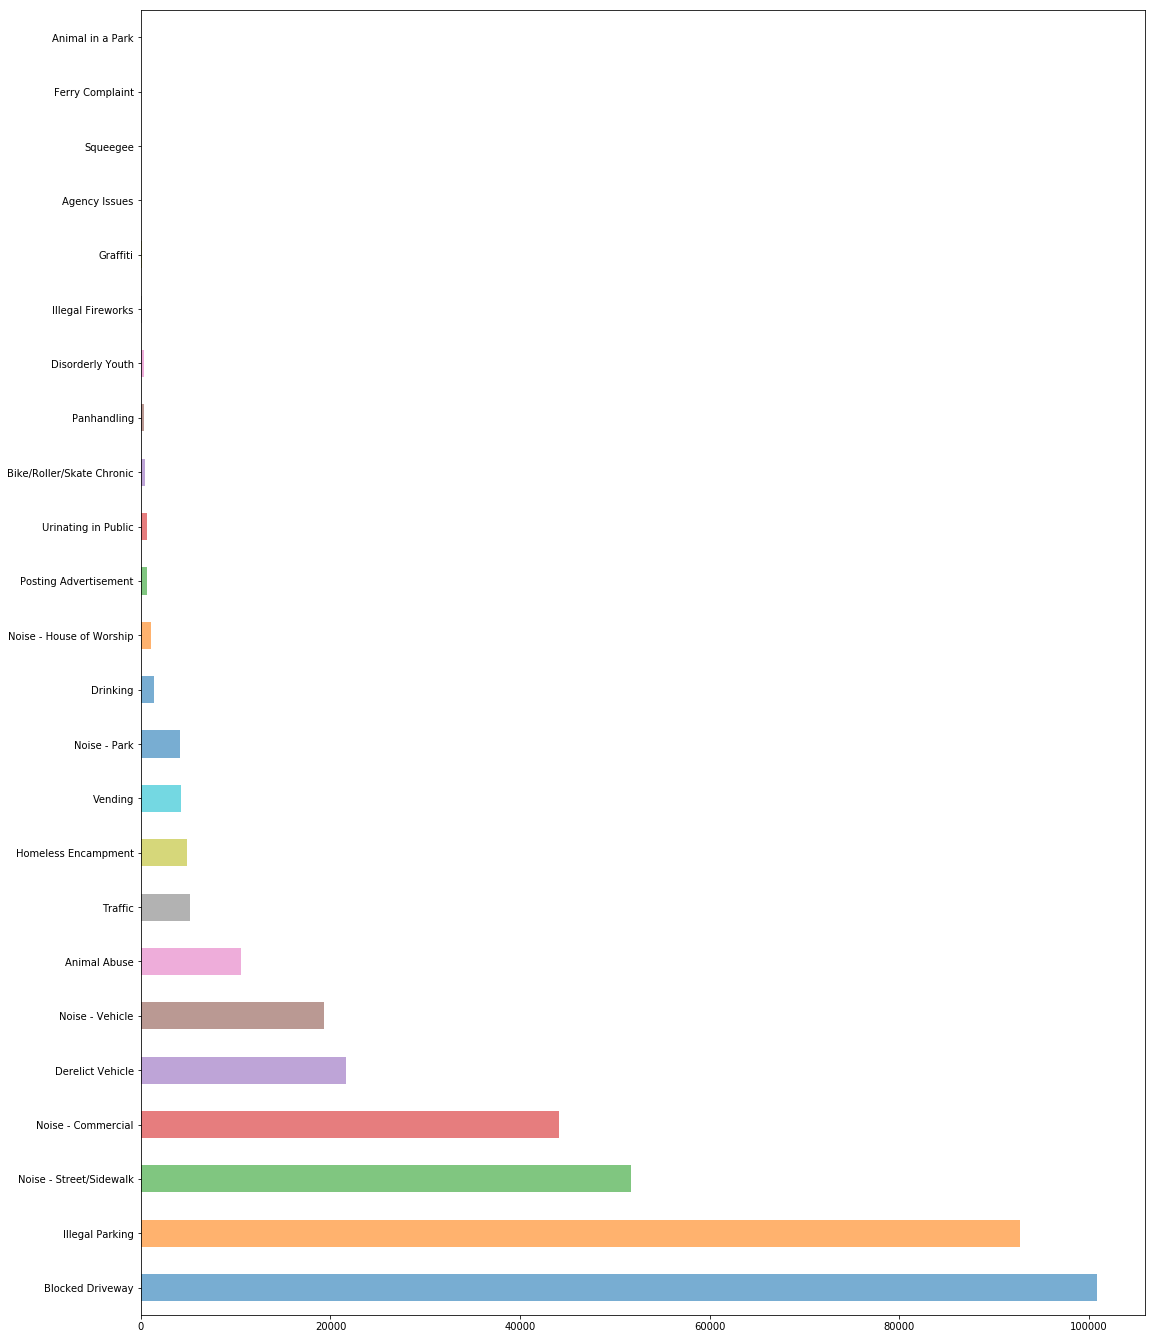

In [178]:
##complaint type breakdown with bars plot to figure out the top 10 complaints
import matplotlib.pyplot as plt
df['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6, figsize=(18,24))
plt.show()

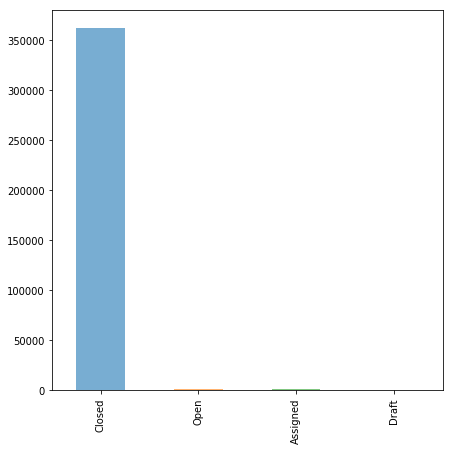

In [129]:
#Retrieving status of tickets
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

In [130]:
#City with the highest complaint
df['City'].value_counts()

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

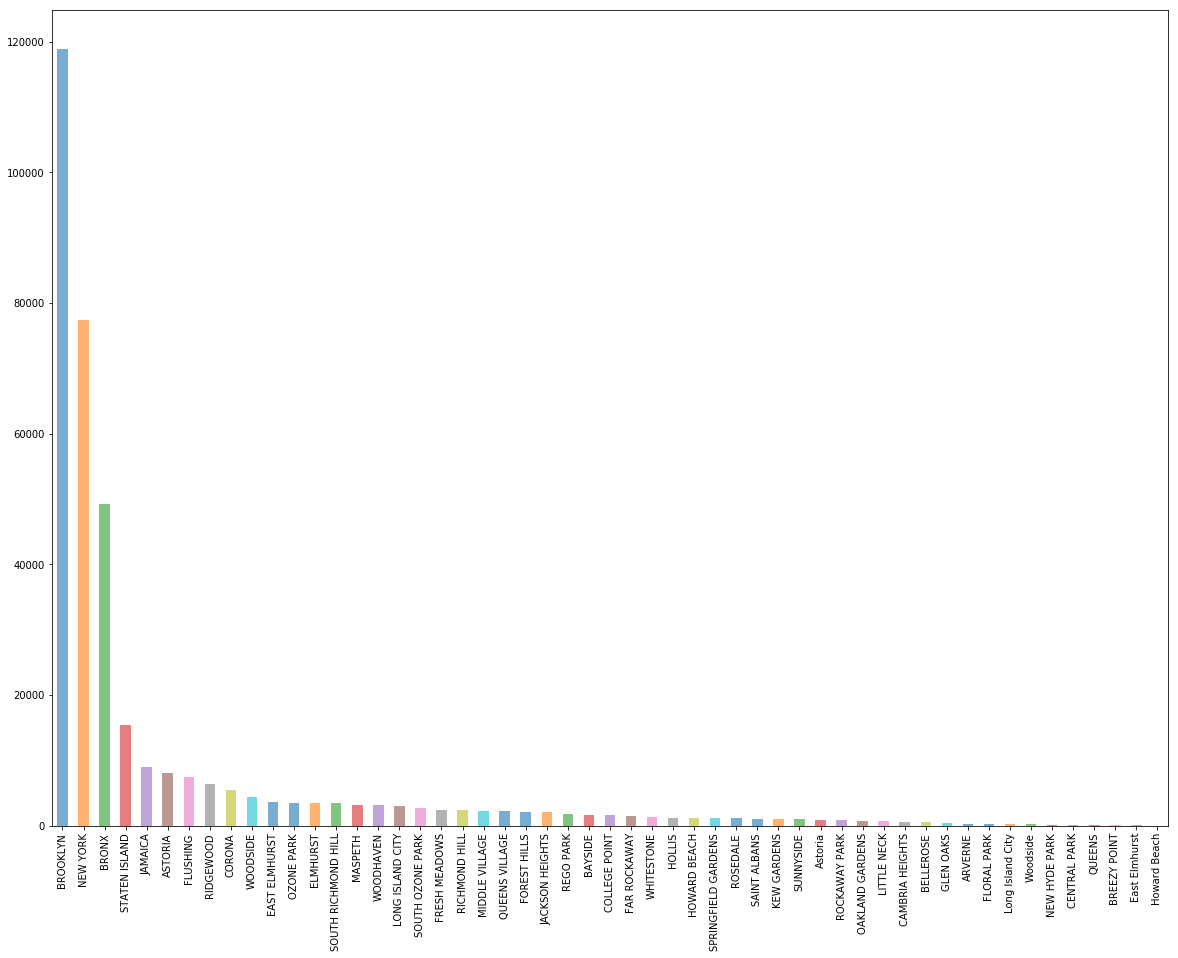

In [131]:
#complaint by city
import matplotlib.pyplot as plt
df['City'].value_counts().plot(kind='bar', alpha=0.6, figsize=(20,15))
plt.show()

In [155]:
#display complaint type and city together
df[['Complaint Type','City']].head(50)

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK
7,Blocked Driveway,BRONX
8,Illegal Parking,KEW GARDENS
9,Blocked Driveway,BROOKLYN


In [139]:
#group data by complaint to display plot against city
groupedby_complainttype=df.groupby('Complaint Type')

In [140]:
grp_data=groupedby_complainttype.get_group('Blocked Driveway')
grp_data.shape

(100881, 53)

In [141]:
# To retrieve NaN Values in the entire dataset
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [142]:
#fill blank values in the city column
df['City'].dropna(inplace=True)

In [143]:
#shape after dropping NaN values
df['City'].shape

(361561,)

In [144]:
#count of null values in grouped city column data
grp_data['City'].isnull().sum()

333

In [145]:
#fixing those NaN with "Unknown City" value instead
grp_data['City'].fillna('Unknown City',inplace=True)

E:\AnacondaInst\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


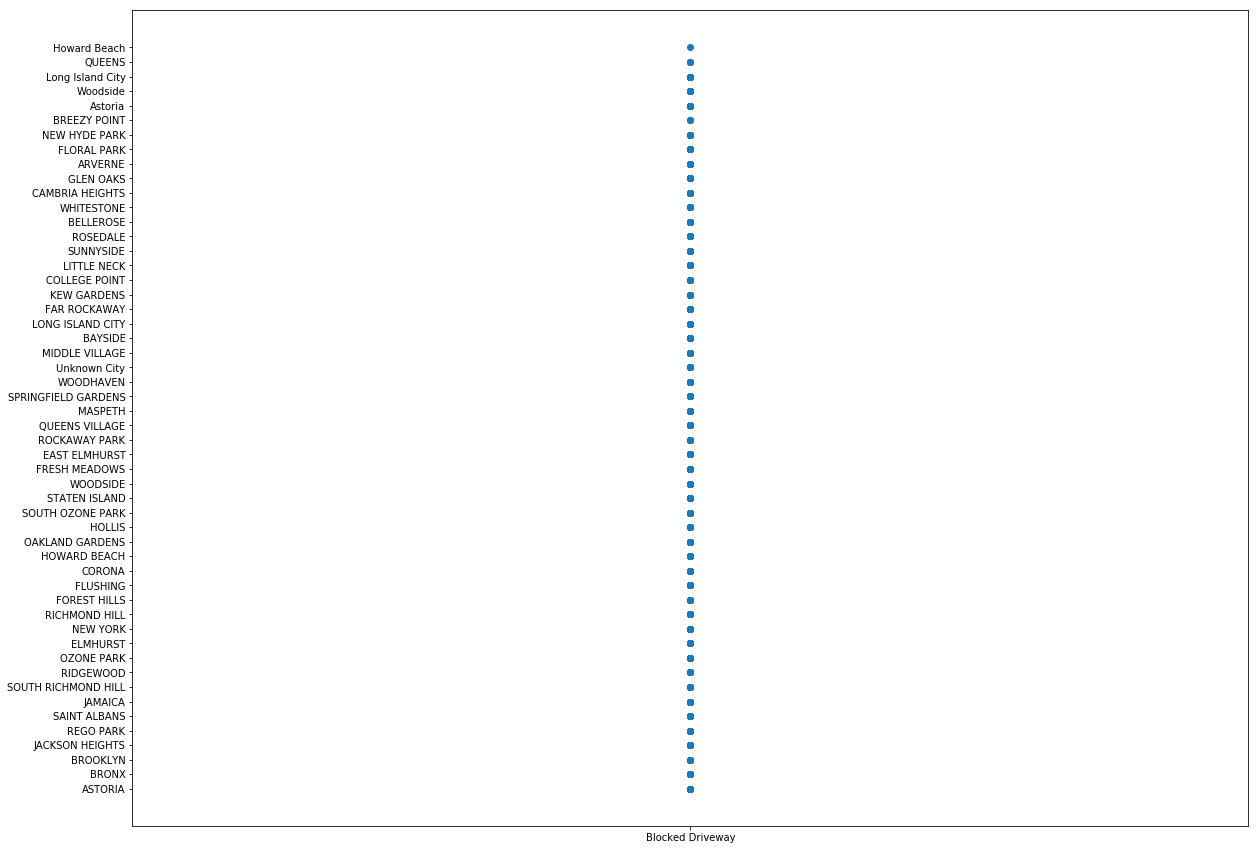

In [192]:
#scatter plot displaying all the cities that raised complaint type 'Blocked Driveway'
plt.figure(figsize=(20,15))
plt.scatter(grp_data['Complaint Type'],grp_data['City'])
plt.title='Plot showing list of cities that raised complaint of type Blocked Driveway'
plt.show()

In [193]:
?plt.title()

In [179]:
#find the top 10 major complaint type and their counts
df['Complaint Type'].value_counts().nlargest(10)

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

In [180]:
#fix location type those NaN with "unknown loaction" value instead
df['Location Type'].fillna('Unknown Loc',inplace=True)

In [181]:
df['Location Type'].values

array(['Street/Sidewalk', 'Street/Sidewalk', 'Street/Sidewalk', ...,
       'Street/Sidewalk', 'Street/Sidewalk', 'Street/Sidewalk'],
      dtype=object)

In [182]:
#count of null values in grouped location type column data
grp_data['Location Type'].isnull().sum()

37

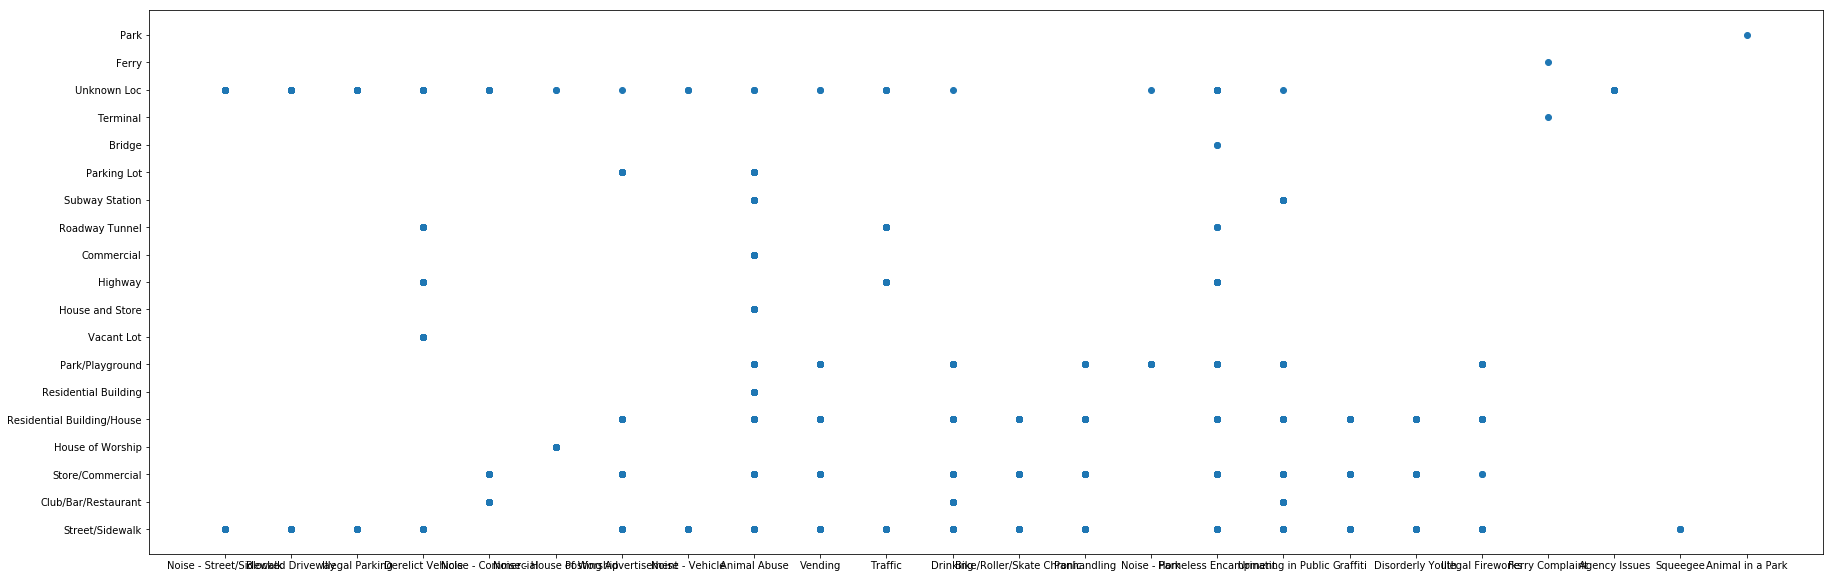

In [202]:
#plot major complaint type heating against loaction type to check for any pattern
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.scatter(df['Complaint Type'],df['Location Type'])
plt.title='Plot complaint type heating against location type'
plt.xlabel='Complaint Type'
plt.ylabel='Location Type'
plt.show()